# Problem statement
## About Company
**Dream Housing Finance** company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

## Problem
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customer segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

## Data

| Variable | Description |
| :---: | :---: |
| Loan_ID | Unique Loan ID |
| Gender | Male/ Female |
| Married | Applicant married (Y/N) |
| Dependents | Number of dependents |
| Education | Applicant Education (Graduate/ Under Graduate) |
| Self_Employed | Self employed (Y/N) |
| ApplicantIncome | Applicant income |
| CoapplicantIncome | Coapplicant income |
| LoanAmount | Loan amount in thousands |
| Loan_Amount_Term | Term of loan in months |
| Credit_History | credit history meets guidelines |
| Property_Area | Urban/ Semi Urban/ Rural |
| Loan_Status | Loan approved (Y/N) |

Explore the dataset and draw insights from it

# Solution

## Load libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Train and test dataset

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


## Exploratory Data Analysis

### 1. Variable identification

| Variable | Type | Data Type | Category |
| :---: | :---: | :---: | :---: |
| Gender | Predictor | Character | Categorical |
| Married | Predictor | Character | Categorical |
| Dependents | Predictor | Numeric | Categorical |
| Education | Predictor | Character | Categorical |
| Self_Employed | Predictor | Character | Categorical |
| ApplicantIncome | Predictor | Numeric | Continuous |
| CoapplicantIncome | Predictor | Numeric | Continuous |
| LoanAmount | Predictor | Numeric | Continuous |
| Loan_Amount_Term | Predictor | Numeric | Continuous |
| Credit_History | Predictor | Numeric | Categorical |
| Property_Area | Predictor | Character | Categorical |
| Loan_Status | Target | Character | Categorical |


In [39]:
continuous_variables = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
categorical_variables = ['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']

### 2. Univariate analysis
#### Continuous variables

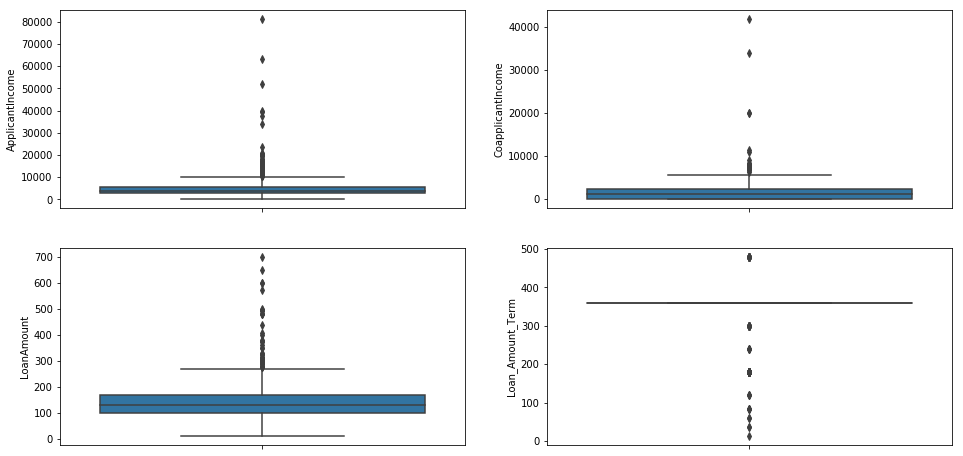

In [66]:
# Box plots of continuous variables
fig, axes = plt.subplots(2,2,figsize=(16,8))

for index, value in enumerate(continuous_variables, start=1):
    plt.subplot(2,2,index)
    sns.boxplot(y=value, data=train)
plt.show()

LoanAmount contains Null values, cannot plot histogram for all values.
Loan_Amount_Term contains Null values, cannot plot histogram for all values.


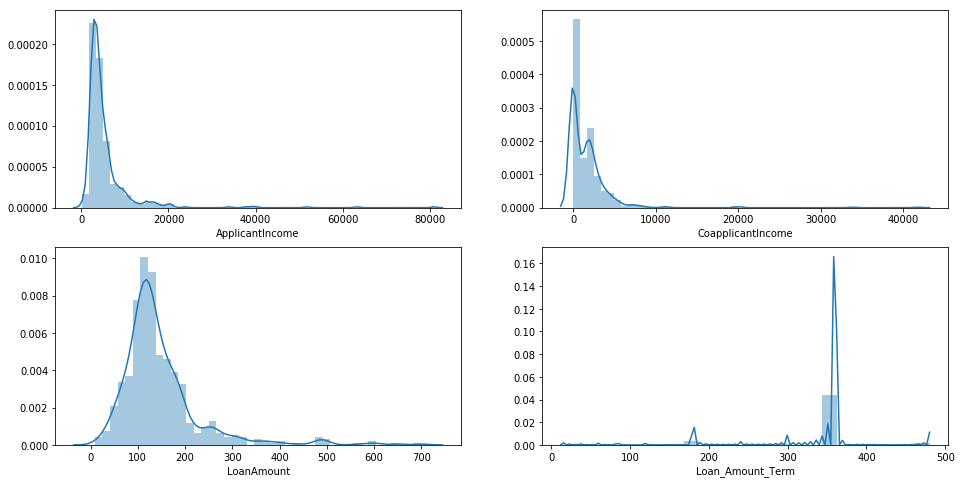

In [67]:
# Plot histograms for continuous variables
fig, axes = plt.subplots(2,2,figsize=(16,8))

for index, value in enumerate(continuous_variables, start=1):
    plt.subplot(2,2,index)
    if (train[value].isnull().any() == True):
        print(value + " contains Null values, cannot plot histogram for all values.")
        sns.distplot(train.loc[train[value].isnull() == False,value])
    else:
        sns.distplot(train[value])

plt.show()

#### Categorical variables

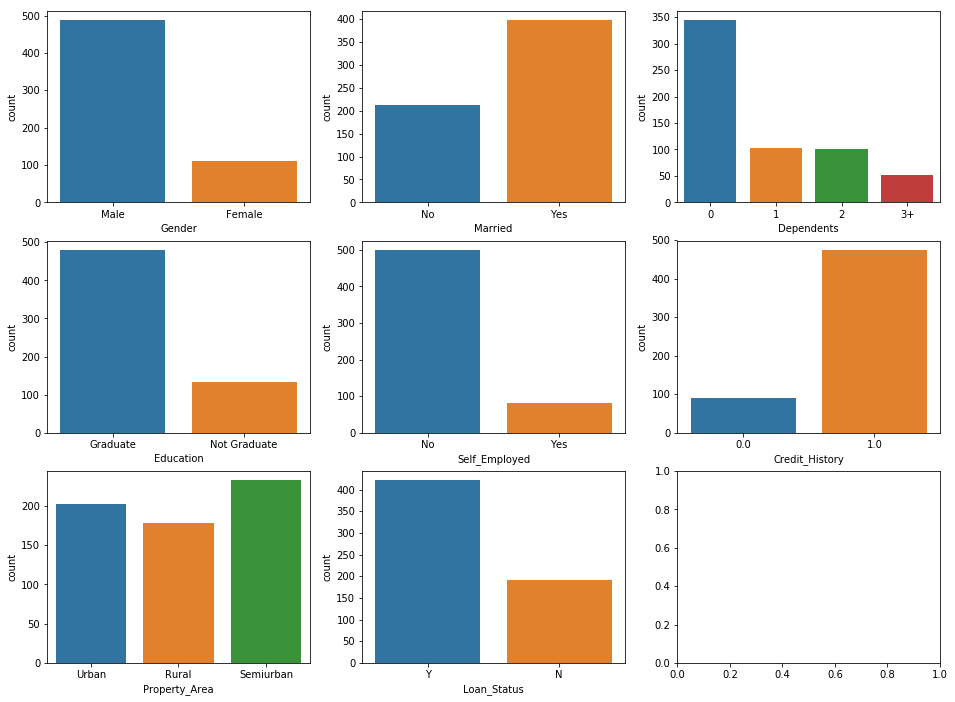

In [70]:
# Plot bar chart for all categorical variables
fig, axes = plt.subplots(3,3,figsize=(16,12))

for index, value in enumerate(categorical_variables, start=1):
    plt.subplot(3,3,index)
    sns.countplot(train[value])
plt.show()